In [4]:
# Import libraries
import os,cv2
import numpy as np
import matplotlib.pyplot as plt

from sklearn.utils import shuffle
from sklearn.cross_validation import train_test_split

from keras import backend as K
K.set_image_dim_ordering('th')

from keras.utils import np_utils
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation, Flatten
from keras.layers.convolutional import Convolution2D, MaxPooling2D
from keras.optimizers import SGD,RMSprop,adam,nadam
from keras import optimizers
from keras.models import model_from_json
%matplotlib inline
#%%

In [5]:
import keras
print keras.__version__ 

1.1.2


In [6]:
PATH = os.getcwd()
# Define data path
#data_path = '/home/kkanagalananthapadm1/data/all_images'
#data_dir_list = os.listdir(data_path)

def Get_Images(dirpath='./',k=1):
    if k<1:
        k=1
    
    dirpath=os.path.abspath(dirpath)

    images=[]
    response=[]
    for root,dirs,files in os.walk(dirpath):
        for f in files:
            if ".png" not in f:
                continue
        
            images.append(os.path.join(root,f))
           # response.append(f.split('_')[3])
            response.append(os.path.join('./data/response',f.split('_')[2]+'_'+f.split('_')[3]+'.png'))
    r_images=np.stack([cv2.imread(i,0) for i in response])
#     r_images = (r_images/127.5-1).astype(int)
    r_images/= 255
    all_images=np.stack([cv2.imread(i,0) for i in images])
#     all_images= (all_images/127.5-1).astype(int)
    all_images/= 255
    samples=np.random.choice(len(all_images),len(all_images),replace=False)

    folded=[samples[i*len(all_images)/k:(i*len(all_images)/k)+len(all_images)/k] for i in xrange(k)]
    
    return(all_images,r_images,np.array(folded))

In [7]:
img,resp,imgarr = Get_Images('./data/data_set',10)

In [ ]:
#xtest=img[imgarr[1]]
#ytest=resp[imgarr[1]]
#xtrain=img[~imgar[1]]
#ytrain=resp[~imgarr[1]]
# xtrain = img[0:8000,]
# ytrain = resp[0:8000,]
# xtest = img[8000:9000,]
# ytest = resp[8000:9000,]
# xvalidate = img[9000:10000,]
xtrain = img[imgarr[np.array([1,1,1,1,1,1,1,1,0,0],np.bool)].flatten()]
ytrain = resp[imgarr[np.array([1,1,1,1,1,1,1,1,0,0],np.bool)].flatten()]
xtest = img[imgarr[np.array([0,0,0,0,0,0,0,0,1,0],np.bool)].flatten()]
ytest = resp[imgarr[np.array([0,0,0,0,0,0,0,0,1,0],np.bool)].flatten()]
xvalidate = img[imgarr[np.array([0,0,0,0,0,0,0,0,0,1],np.bool)].flatten()]
yvalidate = resp[imgarr[np.array([0,0,0,0,0,0,0,0,0,1],np.bool)].flatten()]
xtrain1 = xtrain[0:500]
ytrain1 = ytrain[0:500]

xtrain=np.expand_dims(xtrain, axis=1)
#ytrain=np.expand_dims(ytrain, axis=1)
xtest=np.expand_dims(xtest, axis=1)
#ytest=np.expand_dims(ytest, axis=1)
xvalidate=np.expand_dims(xvalidate, axis=1)
xtrain1=np.expand_dims(xtrain1, axis=1)
#ytrain1=np.expand_dims(ytrain1, axis=1)

print 'xtrain'+str(xtrain.shape)
print 'ytrain'+str(ytrain.shape)

In [9]:
validation=(xvalidate,yvalidate)

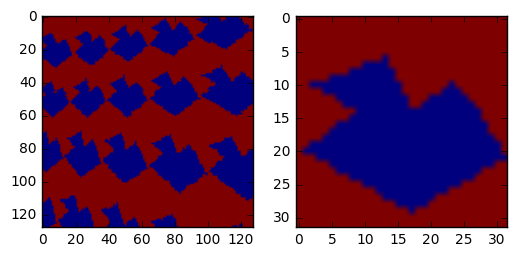

In [10]:
#Check if the training response is the principle image of input 
plt.subplot(1, 2, 1)
plt.imshow(xtrain1[0].reshape(128,-1))
plt.subplot(1, 2, 2)
plt.imshow(ytrain1[0])

In [ ]:
from keras.layers import Reshape, Conv2D, MaxPooling2D, Flatten
model = Sequential()
model.add(Convolution2D(32, 15, 15, activation='relu', input_shape=(1,128,128)))
model.add(MaxPooling2D(pool_size=(2, 2)))
#Outputs 64x64x32filters (effectively 32x32)
model.add(Convolution2D(32, 10, 10, activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
#Outputs 32x32
model.add(Flatten())
model.add(Dense(4096, activation='relu'))
model.add(Dense(2048, activation='relu'))
model.add(Dense(1024, activation='sigmoid'))
model.add(Reshape((32,32)))
batch_size = 256
epochs = 500
sgd = SGD(lr=0.005, decay=1e-5, momentum=0.99, nesterov=False)
model.compile(sgd, loss='categorical_crossentropy', metrics=['accuracy'])
 
earlyStopping=keras.callbacks.EarlyStopping(monitor='val_loss', patience=0, verbose=0, mode='auto')
#onNaN=keras.callbacks.TerminateOnNaN()

history = model.fit(xtrain1, ytrain1, batch_size=batch_size, nb_epoch=epochs, validation_data=validation, callbacks=[earlyStopping], verbose=1)

#import tensorflow as tf
#from keras.backend import tensorflow_backend as K

#with tf.Session(config=tf.ConfigProto(
#                    intra_op_parallelism_threads=1)) as sess:
#    K.set_session(sess)
    
#    history = model.fit(xtrain, ytrain, batch_size=batch_size, nb_epoch=epochs, verbose=1) 

Train on 8000 samples, validate on 1000 samples
Epoch 1/500
8000/8000 [==============================] - 307s - loss: 59.2072 - acc: 0.0805 - val_loss: 58.4712 - val_acc: 0.1383
Epoch 2/500
8000/8000 [==============================] - 293s - loss: 58.7066 - acc: 0.1130 - val_loss: 57.5699 - val_acc: 0.1232
Epoch 3/500
8000/8000 [==============================] - 294s - loss: 57.8654 - acc: 0.1155 - val_loss: 57.0638 - val_acc: 0.1356
Epoch 4/500
8000/8000 [==============================] - 294s - loss: 57.3813 - acc: 0.0942 - val_loss: 56.4602 - val_acc: 0.0724
Epoch 5/500
8000/8000 [==============================] - 293s - loss: 56.7499 - acc: 0.0802 - val_loss: 55.9043 - val_acc: 0.0833
Epoch 6/500
8000/8000 [==============================] - 294s - loss: 56.2331 - acc: 0.0824 - val_loss: 55.4094 - val_acc: 0.0883
Epoch 7/500
8000/8000 [==============================] - 294s - loss: 54.1907 - acc: 0.5588 - val_loss: 53.5889 - val_acc: 0.5852
Epoch 14/500
8000/8000 [==================

KeyboardInterrupt: 

In [564]:
model.get_weights()[0]

array([[-0.01524716, -0.01406641, -0.00736781, ...,  0.00679296,
         0.00285021, -0.01066549],
       [-0.01588184,  0.00881789,  0.01254684, ...,  0.0119123 ,
        -0.00207154,  0.00855461],
       [ 0.01363531,  0.00493158,  0.00677104, ..., -0.00914033,
         0.00136225,  0.00934551],
       ..., 
       [-0.00888302, -0.00676765, -0.01398289, ..., -0.00098951,
        -0.00676792, -0.00333797],
       [ 0.0093819 ,  0.00660409,  0.0026741 , ...,  0.01083149,
         0.00942898, -0.00430997],
       [-0.00351412, -0.00198275,  0.00879649, ...,  0.00392589,
        -0.00018651, -0.01249427]], dtype=float32)

In [12]:
score = model.evaluate(xtest, ytest, show_accuracy=True, verbose=1)
score

/usr/lib/python2.7/site-packages/keras/models.py:676: UserWarning: The "show_accuracy" argument is deprecated, instead you should pass the "accuracy" metric to the model at compile time:
`model.compile(optimizer, loss, metrics=["accuracy"])`
  warnings.warn('The "show_accuracy" argument is deprecated, '


1000/1000 [==============================] - 10s    


[52.328232269287106, 0.76818750000000002]

In [509]:
# model_json_lr005_sgd_cc = model.to_json()
# with open("model_json_lr005_sgd_cc.json", "w") as json_file:
#     json_file.write(model_json_lr005_sgd_cc)
    
# model_json_lr005_sgd_cc_normalized = model.to_json()
# with open("model_json_lr005_sgd_cc.json", "w") as json_file:
#     json_file.write(model_json_lr005_sgd_cc_normalized)

model_json_lr005_sgd_cc_normalized_ = model.to_json()
with open("model_json_lr005_sgd_cc.json", "w") as json_file:
    json_file.write(model_json_lr005_sgd_cc_normalized)


In [15]:
# model.save_weights("model_lr005_sgd_cc.h5")
model.save("CNN_Model.h5")
model.save_weights("CNN_Model_Weights.h5")

In [130]:
#model.layers[3]
model.layers[2].get_output_at(0)

<tf.Tensor 'Relu_26:0' shape=(?, 2048) dtype=float32>

In [1]:
history.history

NameError: name 'history' is not defined

In [131]:
model.output_layers

In [16]:
x = np.stack(cv2.imread('/home/kkanagalananthapadm1/data/all_images/Bicubic_rotateZ_polar_rawimage99_grid_100.png',0).flatten())
x = x.reshape(1,-1)
y = model.predict(x)

In [14]:
x = np.stack(cv2.imread('/home/kkanagalananthapadm1/data/bicubic.png',0).flatten())
x = x.reshape(1,-1)
y = model.predict(x)

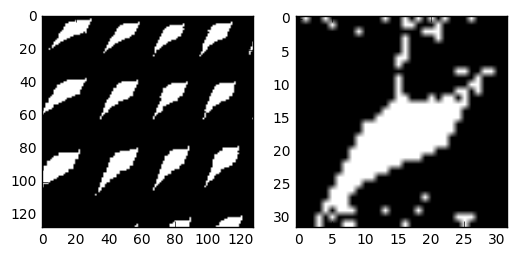

In [21]:
validate_img = cv2.imread('/home/kkanagalananthapadm1/data/all_images/Bicubic_rotateZ_polar_rawimage99_grid_100.png',0)
# validate_img = cv2.imread('/home/kkanagalananthapadm1/data/bicubic.png',0)
plt.subplot(1, 2, 1)
plt.imshow(validate_img,cmap='gray')
plt.subplot(1, 2, 2)
plt.imshow(y[0],cmap='gray')

In [18]:
yvalidate = model.predict(xvalidate)

In [19]:
count=0
for i in yvalidate:
    cv2.imwrite('./data/validation/yvalidate0321'+str(count)+'.png',yvalidate[count])
    count+=1

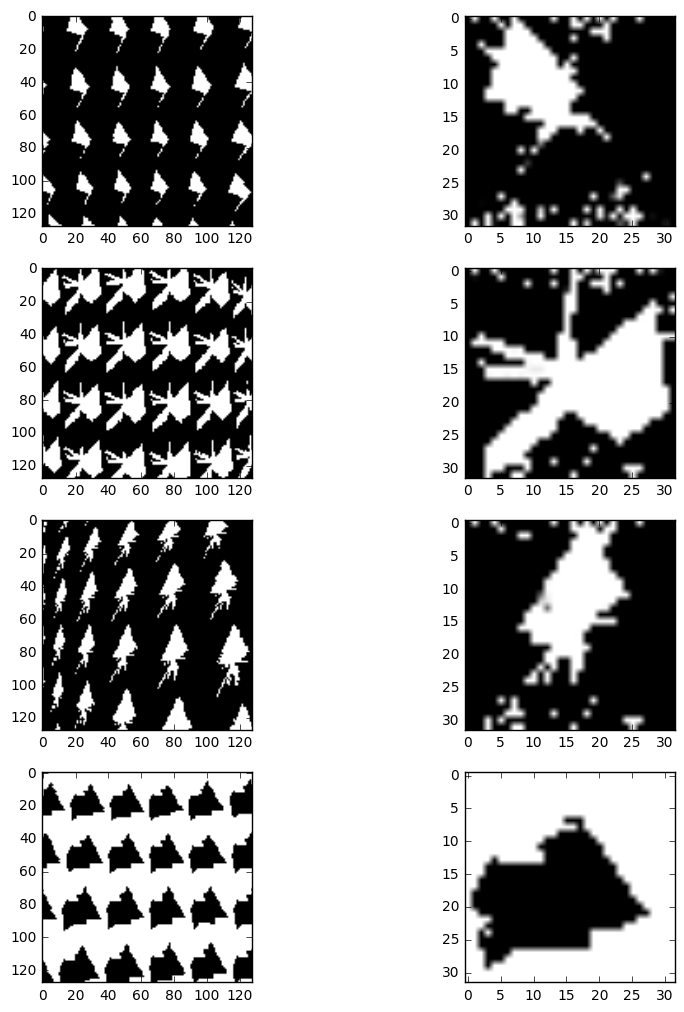

In [24]:
fig = plt.figure(figsize=(10, 32))
plt.subplot(10, 2, 1)
plt.imshow(xvalidate[0].reshape(128,-1),cmap='gray')
plt.subplot(10, 2, 2)
plt.imshow(yvalidate[0],cmap='gray')
plt.subplot(10, 2, 3)
plt.imshow(xvalidate[153].reshape(128,-1),cmap='gray')
plt.subplot(10, 2, 4)
plt.imshow(yvalidate[153],cmap='gray')
plt.subplot(10, 2, 5)
plt.imshow(xvalidate[279].reshape(128,-1),cmap='gray')
plt.subplot(10, 2, 6)
plt.imshow(yvalidate[279],cmap='gray')
plt.subplot(10, 2, 7)
plt.imshow(xvalidate[353].reshape(128,-1),cmap='gray')
plt.subplot(10, 2, 8)
plt.imshow(yvalidate[353],cmap='gray')

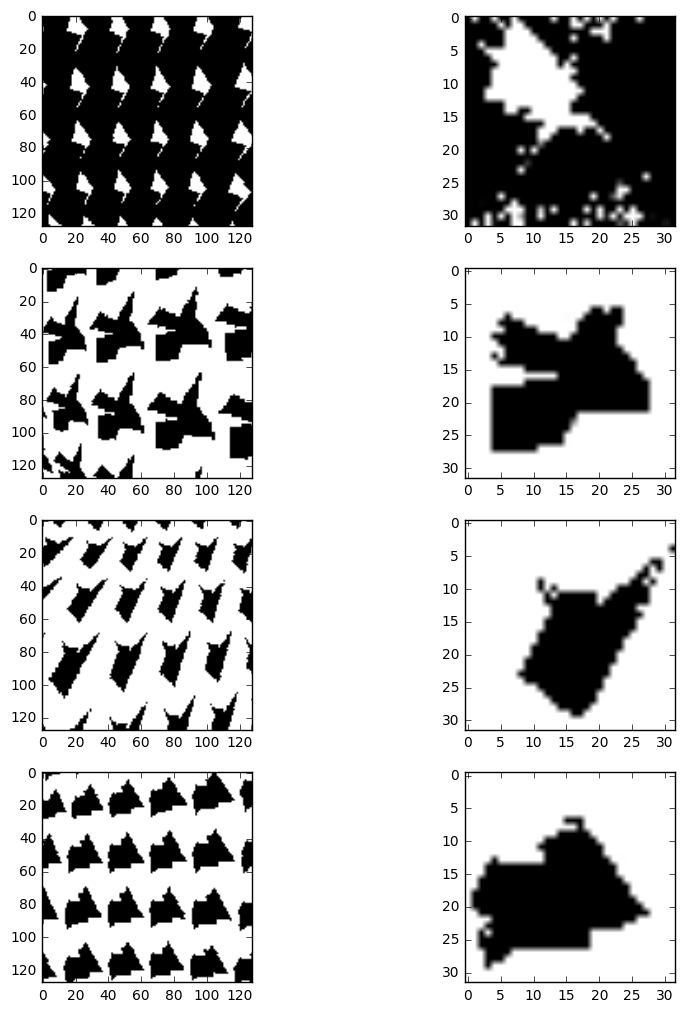

In [27]:
fig = plt.figure(figsize=(10, 32))
plt.subplot(10, 2, 1)
plt.imshow(xvalidate[0].reshape(128,-1),cmap='gray')
plt.subplot(10, 2, 2)
plt.imshow(yvalidate[0],cmap='gray')
plt.subplot(10, 2, 3)
plt.imshow(xvalidate[176].reshape(128,-1),cmap='gray')
plt.subplot(10, 2, 4)
plt.imshow(yvalidate[176],cmap='gray')
plt.subplot(10, 2, 5)
plt.imshow(xvalidate[243].reshape(128,-1),cmap='gray')
plt.subplot(10, 2, 6)
plt.imshow(yvalidate[243],cmap='gray')
plt.subplot(10, 2, 7)
plt.imshow(xvalidate[399].reshape(128,-1),cmap='gray')
plt.subplot(10, 2, 8)
plt.imshow(yvalidate[399],cmap='gray')

In [66]:
train_loss=history.history['loss']
print train_loss
#val_loss=history.history['val_loss']
#print val_loss
train_acc=history.history['acc']
print train_acc
#val_acc=history.history['val_acc']
#print val_acc


print('Test Loss:', score[0])
print('Test accuracy:', score[1])

[26236.195028124999, 24913.567387499999, 24668.5310875, 23844.628609374999, 23749.644587499999, 23560.3417625, 23362.662875000002, 22701.302978125001, 22474.754490625, 22344.481681249999, 22277.099171875001, 22245.204225000001, 22068.152287500001, 21942.939096875001, 21886.249721875, 21871.889412500001, 21812.197628124999, 21761.118818750001, 21742.890493750001, 21722.791181249999, 21723.142296875001, 21705.861378124999, 21696.487462500001, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan]
[0.054068749999999999, 0.059499999976158145, 0.070131249964237211, 0.072824999976158142, 0.097968749916553494, 0.062356250059604643, 0.11045000007152557, 0.094543749833106996, 0.10253749998807907, 0.1403687500357628, 0.13319999998807908, 0.14626874992847444, 0.18926249990463256, 0.12216874998807907, 0.10711875, 0.12203125011920929, 0.13023124990463256, 0.11973749997615814, 0.14650624983310701, 0.14979375007152557, 0.